In [7]:
import gdown
import os
import zipfile
import tarfile
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
output = 'metashifts.zip'
data_root = "/bigtemp/gz5hp/dataset_hub/"
url = 'https://drive.google.com/uc?id=1WySOxBRkxAUlSokgZrC-0JaWZwcG5UMT'
if not os.path.exists(os.path.join(data_root, 'metashifts')):
    gdown.download(url, os.path.join(data_root, output), quiet=False)
    with zipfile.ZipFile(os.path.join(data_root, output), 'r') as zip_ref:
        zip_ref.extractall(data_root)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1WySOxBRkxAUlSokgZrC-0JaWZwcG5UMT
From (redirected): https://drive.google.com/uc?id=1WySOxBRkxAUlSokgZrC-0JaWZwcG5UMT&confirm=t&uuid=251c3f99-8f2a-420d-b862-1ba0bd357911
To: /bigtemp/gz5hp/dataset_hub/metashifts.zip
100%|██████████| 226M/226M [00:02<00:00, 80.1MB/s] 


In [20]:
import pickle

In [21]:
concept_waterbirds = "/bigtemp/gz5hp/dataset_hub/waterbird_complete95_forest2water2/img_embeddings_thre10_vocab144.pickle"
concept_celeba = "/bigtemp/gz5hp/dataset_hub/celebfaces/img_align_celeba/img_embeddings_thre10_vocab345.pickle"
concept_metashift = "/bigtemp/gz5hp/dataset_hub/metashifts/MetaDatasetCatDog/img_embeddings_thre10_vocab86.pickle"
with open(concept_waterbirds, "rb") as f:
    embeddings = pickle.load(f)
    print("waterbirds",embeddings.sum(axis=1).mean())

waterbirds 4.314217848659654


In [22]:
with open(concept_celeba, "rb") as f:
    embeddings = pickle.load(f)
    print("celeba",embeddings.sum(axis=1).mean())
with open(concept_metashift, "rb") as f:
    embeddings = pickle.load(f)
    print("metashift",embeddings.sum(axis=1).mean())

celeba 4.291442702086387
metashift 3.3311298076923075


In [8]:
def get_data(groups, is_training):
    filenames = []
    group_ids = []
    ys = []
    id_count = 0
    animal_count = 0
    for animal in groups.keys():
        if is_training:
            for _, group_animal_data in groups[animal].items():
                for group in group_animal_data:
                    for file in os.listdir(f"{train_data_dir}/{animal}/{animal}({group})"):
                        filenames.append(os.path.join(f"{train_data_dir}/{animal}/{animal}({group})", file))
                        group_ids.append(id_count)
                        ys.append(animal_count)
                id_count += 1
        else:
            for group in groups[animal]:
                for file in os.listdir(f"{test_data_dir}/{animal}/{animal}({group})"):
                    filenames.append(os.path.join(f"{test_data_dir}/{animal}/{animal}({group})", file))
                    group_ids.append(id_count)
                    ys.append(animal_co`unt)
                id_count += 1
        animal_count += 1
    return filenames, np.array(group_ids), np.array(ys)
root_dir = "/bigtemp/gz5hp/dataset_hub/metashifts/MetaDatasetCatDog"
train_data_dir = os.path.join(root_dir, "train")
test_data_dir = os.path.join(root_dir, 'test')
cat_dict = {0: ["sofa"], 1: ["bed"]}
dog_dict = {0: ['bench'], 1: ['bike']}
test_groups = { "cat": ["shelf"], "dog": ["shelf"]}
train_groups = {"cat": cat_dict, "dog": dog_dict}

train_filename_array, train_group_array, train_y_array = get_data(train_groups,is_training=True)
test_filename_array, test_group_array, test_y_array = get_data(test_groups,is_training=False)
np.random.seed(100)
test_idxes = np.arange(len(test_group_array))
val_idxes, _ = train_test_split(np.arange(len(test_idxes)), test_size=0.85, random_state=0)
test_idxes = np.setdiff1d(test_idxes, val_idxes)

# define the split array
train_split_array = np.zeros(len(train_group_array))
test_split_array = 2 * np.ones(len(test_group_array))
test_split_array[val_idxes] = 1

filename_array = np.concatenate([train_filename_array, test_filename_array])
group_array = np.concatenate([train_group_array, test_group_array])
split_array = np.concatenate([train_split_array, test_split_array])
split_dict = {'train': 0, 'val': 1, 'test': 2}

y_array = np.concatenate([train_y_array, test_y_array])


In [14]:
'/'.join(filename_array[0].split('/')[6:])

'train/cat/cat(sofa)/2409593.jpg'

In [18]:
with open(os.path.join(root_dir, "metadata.csv"), "w") as fout:
    fout.write("img_id,img_filename,y,split,group\n")
    for i in range(len(filename_array)):
        idx = i+1
        filename = '/'.join(filename_array[i].split('/')[6:])
        y = int(y_array[i])
        split = int(split_array[i])
        group = int(group_array[i])
        fout.write(f"{idx},{filename},{y},{split},{group}\n")

In [120]:
# # Download the correct version of the waterbirds dataset
# url = "https://drive.google.com/file/d/1xPNYQskEXuPhuqT5Hj4hXPeJa9jh7liL/view?usp=sharing"
# target_file = "/bigtemp/gz5hp/dataset_hub/waterbirds.zip"
# gdown.download(url=url, output=target_file, quiet=False, fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1xPNYQskEXuPhuqT5Hj4hXPeJa9jh7liL
From (redirected): https://drive.google.com/uc?id=1xPNYQskEXuPhuqT5Hj4hXPeJa9jh7liL&confirm=t&uuid=041af58e-9fb8-4015-81ea-60a2a85d4ff9
To: /bigtemp/gz5hp/dataset_hub/waterbirds.zip
100%|██████████| 492M/492M [00:06<00:00, 71.8MB/s] 


KeyboardInterrupt: 

In [ ]:
# # Download DFR model checkpoints
# url = "https://drive.google.com/drive/folders/1OQ_oPPgxgK_7j_GCt71znyiRj6hqi_UW"
# target_folder = "/bigtemp/gz5hp/spurious_correlations/"
# gdown.download_folder(url, quiet=True, output=target_folder, use_cookies=False)

['/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed1/celeba_erm_seed1_dfr_linear_model_target.pkl',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed1/command.sh',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed1/final_checkpoint.pt',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed1/log.txt',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed2/celeba_erm_seed2_dfr_linear_model_target.pkl',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed2/command.sh',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed2/final_checkpoint.pt',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed2/log.txt',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed3/celeba_erm_seed3_dfr_linear_model_target.pkl',
 '/bigtemp/gz5hp/spurious_correlations/dfr_models/dfr-ckpts/celeba/erm_seed3

In [ ]:
# !python3 deep_feature_reweighting/dfr_evaluate_spurious.py\
#   --data_dir=/bigtemp/gz5hp/dataset_hub/waterbird_complete95_forest2water2 \
#   --result_path=/bigtemp/gz5hp/spurious_correlations/results/dfr_results.pkl\
#   --ckpt_path=/bigtemp/gz5hp/spurious_correlations/dfr_ckpts/waterbirds/erm_seed1/final_checkpoint.pt \
#   --tune_class_weights_dfr_train

11788
4795
11788
5794
11788
1199
/u/gz5hp/ml/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/u/gz5hp/ml/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Base Model
100%|███████████████████████████████████████████| 48/48 [00:08<00:00,  5.75it/s]
{'test': {'accuracy_0_0': 0.9964523281596452, 'accuracy_0_1': 0.8656319290465632, 'accuracy_1_0': 0.6931464174454829, 'accuracy_1_1': 0.9626168224299065, 'mean_accuracy': 0.9081808767690714, 'worst_accuracy': 0.6931464174454829}, 'val': {'accuracy_0_0': 0.9935760171306209, 'accuracy_0_1': 0.8347639484978541, 'accuracy_1_0': 0.6917293233082706, 'accuracy_1_1': 0.

In [ ]:
# get the ERM model, 
# Get the heatmap of a bird
# get the mask of a bird image (need to look at how to generate waterbirds)


In [62]:
import torchvision
import torch
import numpy as np
from pytorch_grad_cam import XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
import os

In [61]:
img_path = "/u/gz5hp/spurious_correlations/waterbirds_images_5/mask_seabird_land_1.png"
def get_mask(img_path):
    img = Image.open(img_path).convert("RGB")
    img = np.array(img)
    print(img.max())
    img = cv2.resize(img, (224, 224))
    img = (img == 255).astype(np.uint8) * 255
    return img.mean(axis=-1)
    # plt.imshow(img.mean(axis=-1))
img = get_mask(img_path)
torch.tensor(img).dtype

255


torch.float64

In [2]:
def set_gpu(gpu):
    print("set gpu:", gpu)
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu

set_gpu("1")

set gpu: 1


In [2]:
def load_erm_model(n_classes: int, ckpt_path: str) -> torchvision.models.resnet.ResNet:
    model = torchvision.models.resnet50(weights=None)
    d = model.fc.in_features
    model.fc = torch.nn.Linear(d, n_classes)
    model.load_state_dict(torch.load(ckpt_path,map_location="cpu"))
    model.cuda()
    model.eval()
    return model
erm_model_path = "/bigtemp/gz5hp/spurious_correlations/dfr_ckpts/waterbirds/erm_seed1/final_checkpoint.pt"
erm_model = load_erm_model(2, erm_model_path)


In [3]:
from deep_feature_reweighting.wb_data import WaterBirdsDataset, get_loader, get_transform_cub

In [4]:
test_transform = get_transform_cub(target_resolution=(224, 224),
                                   train=False, augment_data=False)
trainset = WaterBirdsDataset(
    basedir="/bigtemp/gz5hp/dataset_hub/waterbird_complete95_forest2water2", split="train", transform=test_transform, segmask="/bigtemp/gz5hp/dataset_hub/cub200_2011/CUB_200_2011/segmentations")

valset = WaterBirdsDataset(
    basedir="/bigtemp/gz5hp/dataset_hub/waterbird_complete95_forest2water2", split="val", transform=test_transform, segmask="/bigtemp/gz5hp/dataset_hub/cub200_2011/CUB_200_2011/segmentations")
testset = WaterBirdsDataset(
    basedir="/bigtemp/gz5hp/dataset_hub/waterbird_complete95_forest2water2", split="test", transform=test_transform, segmask="/bigtemp/gz5hp/dataset_hub/cub200_2011/CUB_200_2011/segmentations")

loader_kwargs = {'batch_size': 100,
                 'num_workers': 4, 'pin_memory': True,
                 "reweight_places": None}
train_loader = get_loader(
    trainset, train=True, reweight_groups=None, reweight_classes=None,
    **loader_kwargs)
val_loader = get_loader(
    valset, train=False, reweight_groups=None, reweight_classes=None,
    **loader_kwargs)
test_loader = get_loader(
    testset, train=False, reweight_groups=None, reweight_classes=None,
    **loader_kwargs)


11788
4795
11788
1199
11788
5794


In [7]:
def get_group_data(loader):
    group_data = {}
    for x, y, g, p, seg in loader:
        for i in range(len(g)):
            gid = g[i].item()
            if gid in group_data:
                group_data[gid].append((x[i], y[i], p[i], seg[i]))
            else:
                group_data[gid] = [(x[i], y[i], p[i], seg[i])]
    for gid in group_data:
        g_x, g_y, g_p, g_s = [], [], [], []
        for eles in group_data[gid]:
            g_x.append(eles[0])
            g_y.append(eles[1])
            g_p.append(eles[2])
            g_s.append(eles[3])
        g_x = torch.stack(g_x)
        g_y = torch.stack(g_y)
        g_p = torch.stack(g_p)
        g_s = torch.stack(g_s)
        group_data[gid] = [g_x, g_y, g_p, g_s]
    return group_data
def sel_samples(group_data, sel_g, num_per_class):
    x, y, p, seg = group_data[sel_g]
    classes = torch.unique(y) 
    nums = []
    for c in classes: # 1 for water; 0 for land. 1 for seabird; 0 for landbird.
        nums.append(len(x[y==c]))
    nums = np.array(nums)
    min_num = nums.min()
    assert num_per_class <= min_num, f"num_per_class > {min_num}"
    sel_samples = []
    sel_classes = []
    sel_places = []
    sel_segs = []
    for c in classes:
        indexes = np.arange(len(x[y==c]))
        np.random.shuffle(indexes)
        indexes = indexes[0:num_per_class]
        sel_samples.append(x[y==c][indexes])
        sel_classes.append(y[y==c][indexes])
        sel_places.append(p[y==c][indexes])
        sel_segs.append(seg[y==c][indexes])
    sel_samples = torch.cat(sel_samples)
    sel_classes = torch.cat(sel_classes)
    sel_places = torch.cat(sel_places)
    sel_segs = torch.cat(sel_segs)
    return sel_samples, sel_classes, sel_places, sel_segs

places = ["land", "water"]
birds = ["landbird","seabird"]


In [8]:
group_data = get_group_data(val_loader)

In [9]:
gid = 0
data = pd.DataFrame({"label":group_data[gid][1].numpy(), "attribute":group_data[gid][2].numpy()})
data.value_counts()

label  attribute
0      0            467
dtype: int64

In [10]:
#group id: [class, place], [0,1]-> 1 and [1,0] -> 2
sel_x0, sel_y0, sel_p0, sel_s0 = sel_samples(group_data, 0, 1)
sel_x1, sel_y1, sel_p1, sel_s1 = sel_samples(group_data, 1, 1)
sel_x2, sel_y2, sel_p2, sel_s2 = sel_samples(group_data, 2, 1)
sel_x3, sel_y3, sel_p3, sel_s3 = sel_samples(group_data, 3, 1)
sel_x = torch.cat([sel_x0, sel_x1, sel_x2, sel_x3])
sel_y = torch.cat([sel_y0, sel_y1, sel_y2, sel_y3])
sel_p = torch.cat([sel_p0, sel_p1, sel_p2, sel_p3])
sel_s = torch.cat([sel_s0, sel_s1, sel_s2, sel_s3])

In [5]:
mean = torch.tensor([0.485, 0.456, 0.406]).reshape(1,3,1,1)
std = torch.tensor([0.229, 0.224, 0.225]).reshape(1,3,1,1)
ori_sel_x = sel_x * std + mean
ori_seg = sel_s * std + mean
ori_seg = ori_seg[:,0]
heat_map_generator = XGradCAM(
            model=erm_model,
            target_layers=[erm_model.layer4[-1]],
            use_cuda=True
)
heat_maps = heat_map_generator(sel_x.cuda())

NameError: name 'sel_x' is not defined

In [6]:
def get_embed(m, x):
    x = m.conv1(x)
    x = m.bn1(x)
    x = m.relu(x)
    x = m.maxpool(x)

    x = m.layer1(x)
    x = m.layer2(x)
    x = m.layer3(x)
    x = m.layer4(x)
    return x

In [56]:
class IdentityLayer(torch.nn.Module):
    def __init__(self):
        super(IdentityLayer, self).__init__()
        self.param = torch.nn.Parameter(torch.tensor(1.0))
    def forward(self, x):
        return self.param * x

class LinearModel(torch.nn.Module):
    def __init__(self, n_in, n_out):
        super(LinearModel, self).__init__()
        self.layer1 = IdentityLayer()
        self.avgpool = torch.nn.AdaptiveAvgPool2d((1,1))
        self.layer2 = torch.nn.Linear(n_in, n_out)
    def forward(self, x):
        x = self.layer1(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.layer2(x)
        return x


In [58]:
linear_model(embeddings)

tensor([[ 7.1031, -6.5206],
        [ 3.4177, -2.8843],
        [ 0.1099,  0.1997],
        [-7.3258,  7.8646]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [59]:
erm_model.eval()
with torch.no_grad():
    embeddings = get_embed(erm_model, sel_x.cuda())
print(embeddings.shape)
n_class, n_fea = erm_model.fc.weight.shape
linear_model = LinearModel(n_fea, n_class)
linear_model.layer2.weight.data = erm_model.fc.weight.data
linear_model.layer2.bias.data = erm_model.fc.bias.data
heat_map_generator_linear = XGradCAM(
            model=linear_model,
            target_layers=[linear_model.layer1],
            use_cuda=True,
)

torch.Size([4, 2048, 7, 7])


In [60]:
heatmap_linear = heat_map_generator_linear(embeddings)

In [71]:
heatmap_linear_ori = []
for i in range(len(heatmap_linear)):
    heatmap_linear_ori.append(cv2.resize(heatmap_linear[i], (224,224)))

landbird water


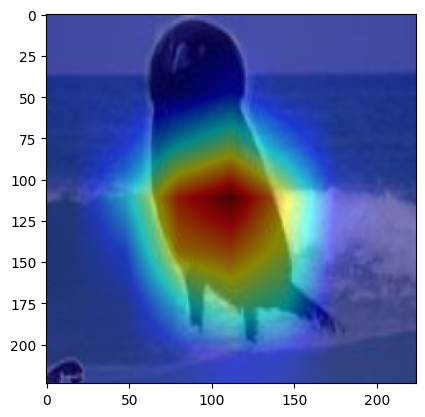

In [74]:
idx = 1
vis = show_cam_on_image(ori_sel_x[idx].detach().permute(1,2,0).cpu().numpy(), heat_maps[idx], use_rgb=True)
print(birds[sel_y[idx].item()], places[sel_p[idx].item()])
plt.imshow(vis)

seabird water


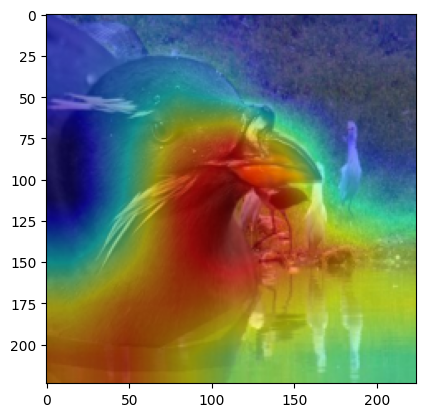

In [66]:
idx = 3
vis = show_cam_on_image(ori_sel_x[idx].detach().permute(1,2,0).cpu().numpy(), heat_maps[idx], use_rgb=True)
print(birds[sel_y[idx].item()], places[sel_p[idx].item()])
plt.imshow(vis)

In [53]:
def test_model(model, loader):
    count = 0
    acc = 0
    model.eval()
    res = []
    groups = []
    with torch.no_grad():
        for x, y, g, p, seg in loader:
            x, y, p, seg = x.cuda(), y.cuda(), p.cuda(), seg.cuda() # 1 for water; 0 for land. 1 for seabird; 0 for landbird.
            out = model(x)
            pred = (torch.argmax(out,dim=-1)==y).detach().cpu().numpy()
            res.append(pred)
            groups.append(g.detach().cpu().numpy())
    res = np.concatenate(res)
    groups = np.concatenate(groups)
    avg_acc = res.sum()/len(res)
    acc_group = []
    group_num = []
    for g in np.unique(groups):
        gres = res[groups==g]
        acc_group.append(gres.sum()/len(gres))
        group_num.append(len(gres))
    acc_group = np.array(acc_group)
    worst_acc = acc_group.min()
    print(group_num)
    return avg_acc, worst_acc       

In [54]:
avg_acc, worst_acc  = test_model(erm_model, val_loader)
print(avg_acc, worst_acc)

[467, 466, 133, 133]
0.8957464553794829 0.6917293233082706


In [15]:
avg_acc, worst_acc = test_model(erm_model, test_loader)
print(avg_acc, worst_acc)

[2255, 2255, 642, 642]
0.9081808767690714 0.6931464174454829


In [26]:
mean = torch.tensor([0.485, 0.456, 0.406]).reshape(1,3,1,1).cuda()
std = torch.tensor([0.229, 0.224, 0.225]).reshape(1,3,1,1).cuda()
heat_map_generator = XGradCAM(
            model=erm_model,
            target_layers=[erm_model.layer4[-1]],
            use_cuda=True
)
for x, y, g, p, seg in train_loader:
    x, y, p, seg = x.cuda(), y.cuda(), p.cuda(), seg.cuda() # 1 for water; 0 for land. 1 for seabird; 0 for landbird.
    ori_x = x * std + mean 
    seg = seg * std+ mean
    heat_maps = heat_map_generator(x)
    break
places = ["land", "water"]
birds = ["landbird","seabird"]

In [38]:
idx = 29

landbird land


(-0.5, 223.5, 223.5, -0.5)

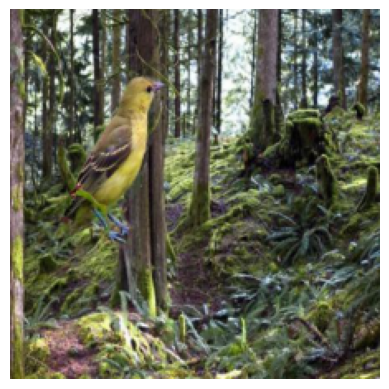

In [39]:
plt.imshow(ori_x[idx].detach().permute(1,2,0).cpu().numpy())
print(birds[y[idx].item()], places[p[idx].item()])
plt.axis("off")

In [37]:
erm_model = load_erm_model(2, erm_model_path)
pred = erm_model(x[idx:idx+1])
print(torch.softmax(pred,axis=1))

tensor([[0.1306, 0.8694]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


seabird water


(-0.5, 223.5, 223.5, -0.5)

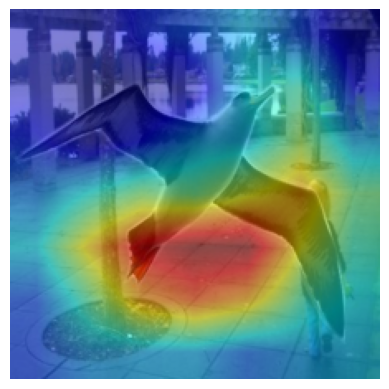

In [17]:
vis = show_cam_on_image(ori_x[idx].detach().permute(1,2,0).cpu().numpy(), heat_maps[idx], use_rgb=True)
print(birds[y[idx].item()], places[p[idx].item()])
plt.imshow(vis)
plt.axis("off")

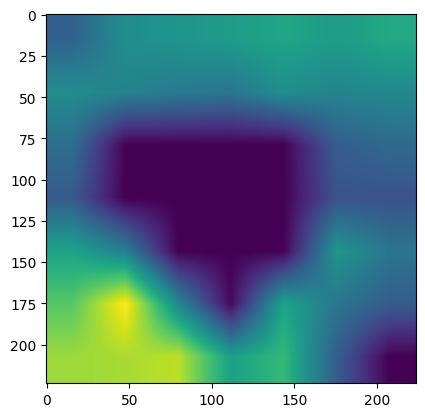

In [13]:
plt.imshow(heat_maps[idx])

1.0


(-0.5, 223.5, 223.5, -0.5)

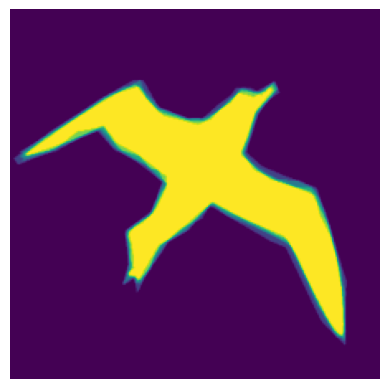

In [18]:
mask = seg[idx,0].detach().cpu().numpy()
print(mask.max())
plt.imshow(mask)
plt.axis("off")

In [24]:
def mask_loss(mask: torch.tensor, ref_mask: torch.tensor):
    """Calculates the loss for the two masks

    Args:
        mask (np.ndarray): the importance mask from the model
        ref_mask (np.ndarray): the reference segmentation mask
    """
    n, h, w = mask.shape
    mse = torch.norm((mask - ref_mask).reshape(n, h*w), dim=1).mean()
    return mse
    
def evolution_algorithm(model, num_population, ref_data, labels, masks, lr, sigma, num_gen):
    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    # Generate multiple directions
    theta = torch.cat([model.fc.weight, model.fc.bias.unsqueeze(1)],dim=1)
    n_classes, n_dim = theta.shape
    targets = [ClassifierOutputTarget(l.item()) for l in labels]
    for g in range(num_gen):
        evo_directions = torch.normal(0, 1, size=(num_population, n_classes, n_dim)).cuda()
        weight_arr = []
        for n in range(num_population):
            individual = theta + sigma * evo_directions[n]
            model.fc.weight.data = individual[:,0:-1]
            model.fc.bias.data = individual[:,-1]
            heat_map_generator = XGradCAM(
                model=model,
                target_layers=[model.layer4[-1]],
                use_cuda=True,
            )
            heat_maps = heat_map_generator(ref_data, targets=targets) #np.ndarray
            heat_maps = torch.tensor(heat_maps)
            loss = mask_loss(heat_maps, masks)
            logits = model(ref_data)
            cls_loss = criterion(logits, labels)
            total_loss = cls_loss + loss
            weight_arr.append(total_loss)
        weight_arr = torch.tensor(weight_arr).cuda()
        print(f"[{g}] Min loss: {weight_arr.min().item():.4f}")
        
        theta = theta - lr * (weight_arr.reshape(num_population, 1, 1) * evo_directions).mean(dim=0)
    return theta
    
    

In [19]:
seg.shape

torch.Size([100, 3, 224, 224])

In [25]:
erm_model_path = "/bigtemp/gz5hp/spurious_correlations/dfr_ckpts/waterbirds/erm_seed1/final_checkpoint.pt"
erm_model = load_erm_model(2, erm_model_path)
theta = evolution_algorithm(erm_model, 100, x[idx:idx+1].cuda(), y[idx:idx+1].cuda(), seg[idx:idx+1,0].detach().cpu(), 0.001, 0.1, 100)

[0] Min loss: 87.5227
[1] Min loss: 73.0746
[2] Min loss: 76.9519
[3] Min loss: 69.0250
[4] Min loss: 79.8592
[5] Min loss: 70.3638
[6] Min loss: 75.6602
[7] Min loss: 58.1465
[8] Min loss: 74.4482
[9] Min loss: 76.8104
[10] Min loss: 69.8459
[11] Min loss: 66.8288
[12] Min loss: 70.2219
[13] Min loss: 53.5504
[14] Min loss: 61.9619
[15] Min loss: 65.6481
[16] Min loss: 66.3269
[17] Min loss: 67.2342
[18] Min loss: 56.7023
[19] Min loss: 64.9927
[20] Min loss: 58.1108
[21] Min loss: 68.4189
[22] Min loss: 64.5214
[23] Min loss: 62.2695
[24] Min loss: 65.1056
[25] Min loss: 67.1103
[26] Min loss: 63.4276
[27] Min loss: 68.2741
[28] Min loss: 53.2446
[29] Min loss: 63.8688
[30] Min loss: 62.8218
[31] Min loss: 62.8854
[32] Min loss: 53.1917
[33] Min loss: 56.9073
[34] Min loss: 63.9840
[35] Min loss: 52.3689
[36] Min loss: 65.3132
[37] Min loss: 56.3355
[38] Min loss: 50.3803
[39] Min loss: 46.3076
[40] Min loss: 53.0970
[41] Min loss: 61.3077
[42] Min loss: 44.6232
[43] Min loss: 54.386

In [30]:
model_path ="/bigtemp/gz5hp/spurious_correlations/mask_expr/model_gval_npc2.pt"
def load_model(n_classes: int, ckpt_path: str) -> torchvision.models.resnet.ResNet:
    model = torch.load(ckpt_path)
    model.cuda()
    model.eval()
    return model
model = load_model(2, model_path)

seabird water


(-0.5, 223.5, 223.5, -0.5)

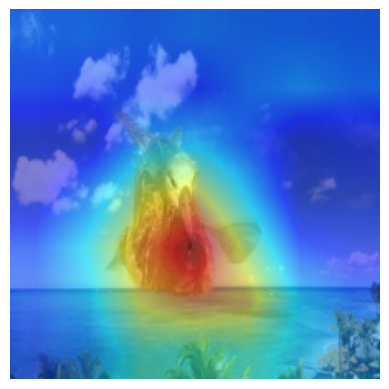

In [31]:
# erm_model = load_erm_model(2, erm_model_path)
# erm_model.fc.weight.data = theta[:,0:-1]
# erm_model.fc.bias.data = theta[:,-1]
heat_map_generator = XGradCAM(
            model=model,
            target_layers=[model.layer4[-1]],
            use_cuda=True,
)
heat_maps = heat_map_generator(x)
idx = 2
vis = show_cam_on_image(ori_x[idx].detach().permute(1,2,0).cpu().numpy(), heat_maps[idx], use_rgb=True)
print(birds[y[idx].item()], places[p[idx].item()])
plt.imshow(vis)
plt.axis("off")

In [59]:
erm_model = load_erm_model(2, erm_model_path)
avg_acc, worst_acc = test_model(erm_model, test_loader)

[2255, 2255, 642, 642]


In [60]:
print(avg_acc, worst_acc)

0.9081808767690714 0.6931464174454829


In [69]:
avg_acc, worst_acc = test_model(erm_model, test_loader)
print(avg_acc, worst_acc)

[2255, 2255, 642, 642]
0.8819468415602347 0.7671840354767184


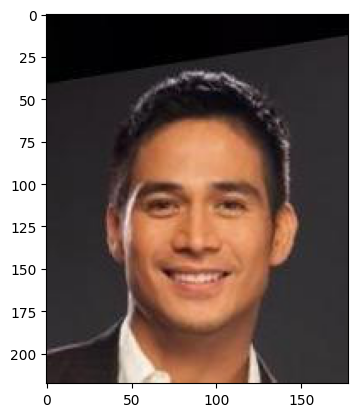

In [63]:
data_folder = "/bigtemp/gz5hp/dataset_hub/celebfaces/img_align_celeba"
img_path = os.path.join(data_folder,"img_align_celeba/000012.jpg") #[y,p] = [0,1]
img = Image.open(img_path).convert("RGB")
plt.imshow(img)


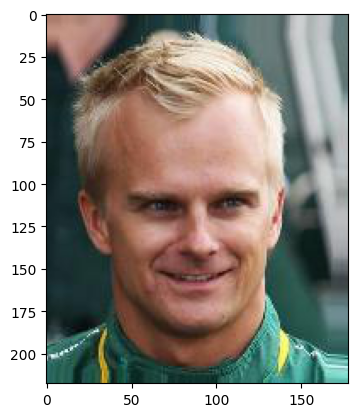

In [64]:
img_path = os.path.join(data_folder,"img_align_celeba/000013.jpg") #[y,p] = [1,1]
img = Image.open(img_path).convert("RGB")
plt.imshow(img)

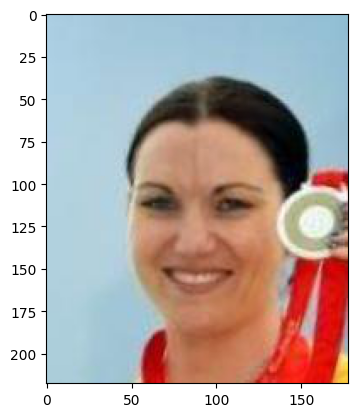

In [65]:
img_path = os.path.join(data_folder,"img_align_celeba/000017.jpg") #[y,p] = [0,0]
img = Image.open(img_path).convert("RGB")
plt.imshow(img)